In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2025-03-11 20:06:36.364771: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 20:06:36.375040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741698396.385226  230175 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741698396.388153  230175 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 20:06:36.402236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Load test dataset
X_test_path = "/media/tairo/Storages/DataSetAnimals/.npy format/X_test.npy"
y_test_path = "/media/tairo/Storages/DataSetAnimals/.npy format/y_test.npy"

In [3]:
X_test = np.load(X_test_path)
y_test = np.load(y_test_path)

In [4]:

# Convert labels to class indices (if needed)
num_classes = len(np.unique(y_test))  # Get number of classes
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes)  # Ensure categorical labelsb

In [5]:
# Load trained model
model_path = "best_model(3).keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1741698403.847846  230175 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1882 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
# Make predictions
y_pred_probs = model.predict(X_test)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

I0000 00:00:1741698405.201912  230444 service.cc:148] XLA service 0x70bc6000ca00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741698405.202028  230444 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-11 20:06:45.213052: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741698405.291928  230444 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-11 20:06:45.894642: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230_0', 100 bytes spill stores, 100 bytes spill loads

2025-03-11 20:06:46.994693: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2

 1/10 ━━━━━━━━━━━━━━━━━━━━ 2:33 17s/step

I0000 00:00:1741698421.845887  230444 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step 


In [7]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


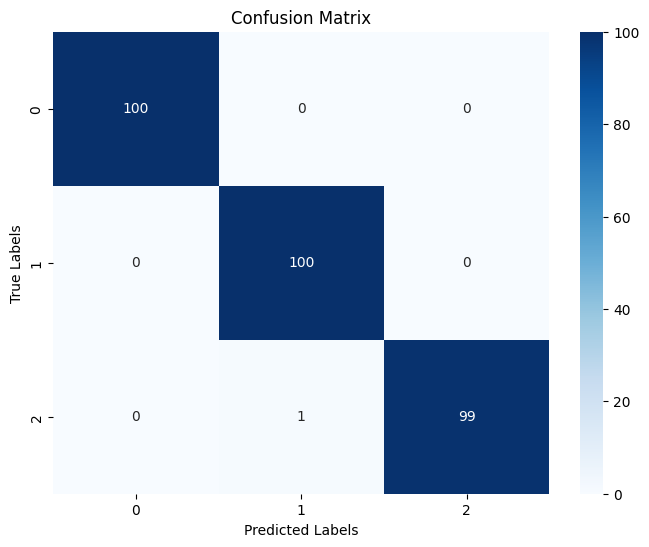

In [8]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Print classification report (includes Precision, Recall, and F1-score)
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       100
           1     0.9901    1.0000    0.9950       100
           2     1.0000    0.9900    0.9950       100

    accuracy                         0.9967       300
   macro avg     0.9967    0.9967    0.9967       300
weighted avg     0.9967    0.9967    0.9967       300

